# COMP4220: Machine Learning, Spring 2021, Assignment 6 (lec 6,8)
Due: Wednsday, April 28, 11pm

Please read lecture 6:Unsupervised Learning and Clustering and lecture 8:Neural Networks and Keras!

Please submit one pdf file for all questions.

You can type your answer for the first two questions in the below cell of each question using "Markdown" option!

****When turning in assignments after the due date, please clearly specify the number of late hours used.

# P1. Describe two techniques to select the right number of clusters when using K-Means.

We can use the elbow technique to identify the inflection point in the inertia vs K graph to identify a general number of clusters that we should use.

We can also use the silhouette score, which is the mean silhouette coefficient over all instances. We would pick the K that has the highest silhouette score. The silhouette score is the mean silhouette coefficient over all the instances, which can be evaluated by (b-a)/max(a-b) where a is the mean distance to instances in the same cluster and b is the mean nearest-cluster distance.




# P2. What is the difference between hard clustering and soft clustering?

Hard clustering is assigning each instance to a single cluster, while soft clustering is assigning a score to each instance per cluster. Usually the score will simulate how similar the instance is to the respective cluster.

# P3. List five hyperparameters you can tweak in a basic neural network?

1. learning rate
2. number of layers
3. number of neurons per layer
4. types of activation functions per layer
5. batch size








# p4: What is backpropagation and how does it work?

Backpropogation is an algorithm that is gradient Descent that computes the gradients in two passes through the network. 
It works by by putting through the full training set in mini-batches. It sends the minibatch through the first hidden layer and computes the output of the neurons in that layer, then passes the result onto the next layer and repeats until we get the output of the output layer.
It then computes the network's output error and then computes how much each layer contributed to the total output error.








# P5. What are some of the main applications of clustering algorithms? (Name at least three applications)


1. Image segmentation
2. Data analysis
3. Anomaly Detection





# P6. Cluster the following points, (18, 10), (21, 11), (22, 22), (24, 15), (26, 12), (26, 13), (27, 14), (30, 33), (31, 39), (35, 37), (39, 44), (40, 27), (41, 29), (42, 20), (44, 28), (46, 21), (47, 30), (48, 31), (49, 23), (54, 24) use the numbers as pairs of x and y values which represent their locations. All distances are measured with Euclidean distance.


In [ ]:
# Importing the libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
data = np.array([[18,10],[21,11],[22,22],[24,15],[26,12],[26,13],[27,14],[30,33],[31,33],[31,39],[35,37],[39,44],[40,27],[41,29],[42,20],[44,28],[46,21],[47,30],[48,31],[49,23],[54,24]])
data

array([[18, 10],
       [21, 11],
       [22, 22],
       [24, 15],
       [26, 12],
       [26, 13],
       [27, 14],
       [30, 33],
       [31, 33],
       [31, 39],
       [35, 37],
       [39, 44],
       [40, 27],
       [41, 29],
       [42, 20],
       [44, 28],
       [46, 21],
       [47, 30],
       [48, 31],
       [49, 23],
       [54, 24]])

# P6.1 Train the Kmeans clustering algorithm on the data with (24, 15), (30, 33), and (54, 24) as the initial cluster centers. Predict the cluster of each data point and show the result. 



In [ ]:
cluster_centers = np.array([[24,15],[30,33],[54,24]])
kmeans = KMeans(n_clusters=3,init=cluster_centers)
cluster_predict = kmeans.fit_predict(data)
cluster_predict


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

# P6.2 Visualize the clusters 

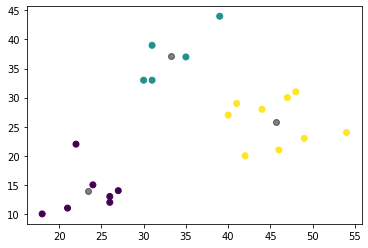

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_predict, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5);

# P7. Programming assignment (KMeans clustering)

In [ ]:
#Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# P7. 1 Use the elbow method to find the optimal number of clusters through a loop (1 to 10 clusters) and visualize the result on a 2D plot
Set init = 'k-means++'



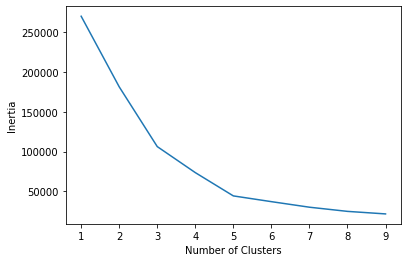

In [ ]:
inertia = []
for k in range(1,10):  
  kmeans = KMeans(n_clusters= k,init='k-means++')
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,10),inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# P7. 2 Fit K-Means to the dataset and use the optimal number of clusters that you found in the previous part and show the result


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
predict = kmeans.fit_predict(X)
predict

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

# P7. 3 Visuale the clusters 
(xlabel('Annual Income (k$)' and ylabel('Spending Score (1-100)'))

Use different colors for clusters and label them



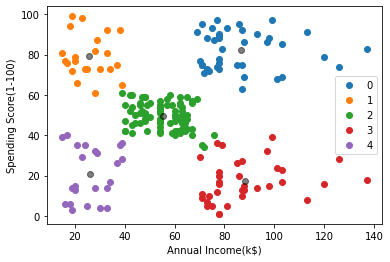

In [ ]:

fig, ax = plt.subplots()
for g in np.unique(predict):
    i = np.where(predict == g)
    ax.scatter(X[i,0], X[i,1], label=g)
ax.legend()
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5);
plt.show()


# P8. Programming Assignment (Artificial Neural Network-ANN)
The problem of classifying customers staying in the bank or leaving!

# Part 1 - Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
tf.__version__

'2.4.1'

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values # Git rid of useless columns # start "CreditScore" column
y = dataset.iloc[:, 13].values   # The last column "Exited" is our dependent variable
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
ct = ColumnTransformer([("Geogrophy", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(X)
X = X[:, 1:]

print(X)
print(y)

[[0.0 1.0 0.0 ... 1 1 101348.88]
 [1.0 0.0 1.0 ... 0 1 112542.58]
 [0.0 1.0 0.0 ... 1 0 113931.57]
 ...
 [0.0 1.0 0.0 ... 0 1 42085.58]
 [1.0 0.0 1.0 ... 1 0 92888.52]
 [0.0 1.0 0.0 ... 1 0 38190.78]]
[[1.0 0.0 1 ... 1 1 101348.88]
 [0.0 1.0 0 ... 0 1 112542.58]
 [1.0 0.0 1 ... 1 0 113931.57]
 ...
 [1.0 0.0 1 ... 0 1 42085.58]
 [0.0 1.0 0 ... 1 0 92888.52]
 [1.0 0.0 1 ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


# P8.1.1 Split the dataset into the Training set and Test set (test_size = 0.2)

In [ ]:

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)



# P8.1.2  Apply Feature Scaling to all features before training a neural network

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_full = sc.fit_transform(X_train_full)
X_test= sc.transform(X_test)
X_valid, X_train = X_train_full[:800], X_train_full[800:]
y_valid,y_train = y_train_full[:800], y_train_full[800:]


# Part 2 - Now let's make the ANN!

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

# P8.2.1 Add the input layer and the first hidden layer

In [ ]:

# hint: (units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11)
classifier.add(keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# P8.2.2 Add the second hidden layer

In [ ]:
#  hint: (units = 6, kernel_initializer = 'uniform', activation = 'relu')
classifier.add(keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


# P8.2.3 Add the output layer

In [ ]:
# (units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')
classifier.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# P8.2.4 Compile the ANN

In [ ]:
# hint: (optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# P8.2.3 Fit the ANN to the Training set

In [ ]:
history = classifier.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
225/225 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.7951 - val_loss: 0.4526 - val_accuracy: 0.7900
Epoch 2/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8000 - val_loss: 0.4410 - val_accuracy: 0.7900
Epoch 3/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8010 - val_loss: 0.4388 - val_accuracy: 0.7900
Epoch 4/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7995 - val_loss: 0.4368 - val_accuracy: 0.7900
Epoch 5/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7915 - val_loss: 0.4327 - val_accuracy: 0.8238
Epoch 6/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8158 - val_loss: 0.4294 - val_accuracy: 0.8213
Epoch 7/30
225/225 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8235 - val_loss: 0.4246 - val_accuracy: 0.8313
Epoch 

# Part 3 - Making the predictions and evaluating the model

# P8.3.1 Predict the Test set results

In [ ]:
# hint: just consider y_pred > 0.5  (y_pred = (y_pred > 0.5))
classifier.evaluate(X_test, y_test)
y_pred = classifier.predict_classes(X_test)
y_pred

63/63 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8395


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

# P8.3.2 Make the Confusion Matrix and show the reult

In [ ]:
from sklearn.metrics import confusion_matrix
ANN_confusion = confusion_matrix(y_test, y_pred)
ANN_confusion

array([[1555,   45],
       [ 276,  124]])